In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
company_data = pd.read_csv('Company_Data.csv')

In [3]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
company_data[company_data.duplicated()].shape

(0, 11)

In [7]:
company_data['Sales'].mean()

7.496325

In [8]:
company_data["Above_average"]=(company_data["Sales"]>7.49)

In [9]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Above_average
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,True
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,True
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,True
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,False
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,True
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,False
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,False
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,False


In [10]:
le=preprocessing.LabelEncoder()
company_data["ShelveLoc"]=le.fit_transform(company_data["ShelveLoc"])
company_data["Urban"]=le.fit_transform(company_data["Urban"])
company_data["US"]=le.fit_transform(company_data["US"])
company_data["Above_average"] = le.fit_transform(company_data["Above_average"])

In [11]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Above_average
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [12]:
x=company_data.iloc[:,1:9]
y=company_data.iloc[:,-1]

In [13]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
0,138,73,11,276,120,0,42,17
1,111,48,16,260,83,1,65,10
2,113,35,10,269,80,2,59,12
3,117,100,4,466,97,2,55,14
4,141,64,3,340,128,0,38,13


In [14]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Above_average, dtype: int64

In [15]:
from sklearn.model_selection import KFold

In [16]:
kfold=KFold(n_splits=10)

In [17]:
model = RandomForestClassifier(n_estimators=110, max_features=6)

In [18]:
result=cross_val_score(model,x,y,cv=kfold)

In [19]:
result

array([0.825, 0.875, 0.75 , 0.75 , 0.775, 0.9  , 0.825, 0.825, 0.85 ,
       0.825])

In [20]:
print(result.mean())

0.82


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=6, n_estimators=110)

In [24]:
from sklearn import metrics

In [25]:
Y_pred=model.predict(x_train)

In [26]:
model.score(x_train, y_train)

1.0

In [27]:
y_pred=model.predict(x_test)

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8125


In [29]:
model.score(x_test, y_test)

0.8125

In [30]:
model.predict([[90,110,25,300,85,10,5,12,]])

array([1], dtype=int64)

In [31]:
Important_feature = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)

In [32]:
Important_feature

Price          0.291463
CompPrice      0.150847
ShelveLoc      0.127464
Advertising    0.118934
Age            0.105017
Income         0.091997
Population     0.070764
Education      0.043514
dtype: float64

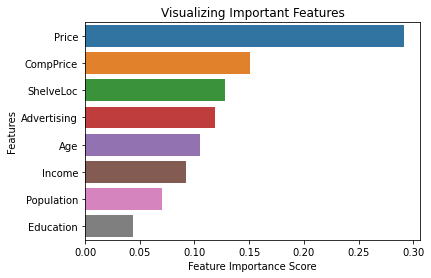

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=Important_feature, y=Important_feature.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()